# <font color = "white"><div align = "center"> Regression</font></div>

In [49]:
import pandas as pd
import numpy as np 
import math as mt 
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import twitter_samples 
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt 
import re # library for regular expression␣operations
import string # for string operations
from nltk.corpus import stopwords # module for stop words that come with NLTK
from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing strings
import random

# <font color = "red"><div align = "left"> Data Importation and Pre-processing</font></div>

In [50]:
training_path = "../tweet-sentiment-extraction/train.csv"
Train_df = pd.read_csv(training_path)

In [51]:
Train_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [52]:
# dropping rows with missing values

Train_df = Train_df.dropna()

In [53]:
#stopwords represnt a dictionnary (english words)

nltk.download("stopwords")
stopwords_english = stopwords.words('english')
stopwords_punctuation = string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mrabe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
#Tokenization function 

def tokens(words):
    # instantiate tokenizer class
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
    reduce_len=True)
    # tokenize tweets
    tweet_tokens = tokenizer.tokenize(words)
    return tweet_tokens

# Removing Hashtags and hyperlinks

def cleaning_tweet(tweet):
    tweet2= re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet2 = re.sub(r'#', '', tweet2)
    return tweet2

# Removing stopwords and punctuation

def remove_stopwords_punctuation(tweet_tokens):
    tweets_clean = []
    for word in tweet_tokens: # Go through every word in your tokens list
        if (word not in stopwords_english and # remove stopwords
            word not in string.punctuation): # remove punctuation
            tweets_clean.append(word)
    return tweets_clean

# Keeping just stems for each work

def stemming(tweet_clean_tokenized):
    # Instantiate stemming class
    stemmer = PorterStemmer()
    # Create an empty list to store the stems
    tweets_stem = []
    for word in tweet_clean_tokenized:
        stem_word = stemmer.stem(word) # stemming word
        tweets_stem.append(stem_word) # append to the list
    return tweets_stem

# processing function

def process_tweet(tweet):
    clear_text = cleaning_tweet(tweet)
    tokenized = tokens(clear_text)
    clean_tweet = remove_stopwords_punctuation(tokenized)
    processed_tweet = stemming(clean_tweet)
    return processed_tweet

In [55]:
#Function for encoding sentiment :

def encoding_sentiment(sentiment):
    if sentiment == "negative":
        return -1
    if sentiment == "neutral":
        return 0
    return 1

In [56]:
#Applying this function on the training dataset


Train_df["text_clear"] = Train_df["text"].apply(process_tweet)
Train_df["selected_text_clear"] = Train_df["selected_text"].apply(process_tweet)

In [57]:
Train_df["sentiment"] = Train_df["sentiment"].apply(lambda x : encoding_sentiment(x))

Labels = Train_df["sentiment"]

Train_df = Train_df.drop(columns = ["textID","selected_text","text","selected_text_clear", "sentiment"])

Train_df

,text_clear
0,"[respond, go]"
1,"[sooo, sad, miss, san, diego]"
2,"[boss, bulli, ...]"
3,"[interview, leav, alon]"
4,"[son, put, releas, alreadi, bought]"
...,...
27476,"[wish, could, come, see, u, denver, husband, l..."
27477,"[wonder, rake, client, made, clear, net, forc,..."
27478,"[yay, good, enjoy, break, probabl, need, hecti..."
27479,[worth]


In [71]:
Labels

0        0
1       -1
2       -1
3       -1
4       -1
        ..
27476   -1
27477   -1
27478    1
27479    1
27480    0
Name: sentiment, Length: 27480, dtype: int64

In [59]:
# Splitting the data

from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature data and 'y' is your target data
X_train, X_val, y_train, y_val = train_test_split(Train_df, Labels, test_size=0.2, random_state=42)

# <font color = "red"><div align = "left"> Building the frequencies dictionnary</font></div>

In [62]:
#Building the corpus of our dataset

corpus = []
for list_words in X_train["text_clear"]:
    for word in list_words:
        if word not in corpus:
            corpus.append(word)


corpus

['oh',
 'hilari',
 'comment',
 'fact',
 'much',
 'thank',
 'tri',
 'hope',
 'bud',
 'trillin',
 'fest',
 'would',
 'honor',
 'guest',
 'hobnob',
 'show',
 'hous',
 'rock',
 'say',
 'goodby',
 'soon',
 '4:30',
 'west',
 'coast',
 'time',
 '..',
 'gettin',
 'readi',
 'catch',
 'flight',
 'back',
 'home',
 'sooo',
 'excit',
 'go',
 'two',
 'fav',
 'boyzzz',
 'puppi',
 'n',
 'bf',
 'comput',
 'slooowww',
 'morn',
 'think',
 'sign',
 'play',
 'yard',
 'lol',
 'thought',
 'suppos',
 'guess',
 'tho',
 'lolol',
 'today',
 'love',
 'day',
 'fun',
 'even',
 'moodl',
 'intro',
 'train',
 '...',
 'age',
 'sinc',
 'done',
 '2',
 'book',
 'want',
 'new',
 'lappi',
 'look',
 'like',
 'nap',
 'wait',
 'still',
 'poor',
 'guy',
 'awww',
 'boy',
 'beard',
 'manli',
 'man-',
 'via',
 'asylm',
 'congratul',
 'phil',
 'packer',
 'complet',
 'london',
 'marathon',
 'x',
 'shine',
 'exampl',
 'us',
 'u',
 'tummi',
 'feel',
 'better',
 'wors',
 'load',
 'highli',
 'qualifi',
 'stuff',
 'use',
 'snail',
 'mail

In [63]:
print(f"The corpus contains :{len(corpus)} word")

The corpus contains :18114 word


In [73]:
# Function that builds the frequency doctionnary for each pair of word and sentiment

def build_freqs(tweets, labels):

    yslist = np.squeeze(labels).tolist()
    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in tweet:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs


In [75]:
freqs_dict = build_freqs(X_train["text_clear"], y_train)

In [76]:
freqs_dict

{('oh', 1): 167,
 ('hilari', 1): 23,
 ('comment', 1): 12,
 ('fact', 1): 9,
 ('much', 1): 205,
 ('thank', 1): 648,
 ('tri', 1): 101,
 ('hope', 1): 436,
 ('bud', 1): 3,
 ('trillin', 1): 1,
 ('fest', 1): 2,
 ('would', 1): 163,
 ('honor', 1): 7,
 ('guest', 1): 3,
 ('hobnob', 1): 1,
 ('show', 0): 116,
 ('hous', 0): 65,
 ('rock', 0): 27,
 ('say', 0): 167,
 ('goodby', 0): 12,
 ('soon', 0): 110,
 ('4:30', 1): 3,
 ('west', 1): 5,
 ('coast', 1): 6,
 ('time', 1): 276,
 ('..', 1): 396,
 ('gettin', 1): 9,
 ('readi', 1): 51,
 ('catch', 1): 18,
 ('flight', 1): 9,
 ('back', 1): 203,
 ('home', 1): 168,
 ('sooo', 1): 78,
 ('excit', 1): 116,
 ('go', 1): 472,
 ('two', 1): 58,
 ('fav', 1): 17,
 ('boyzzz', 1): 1,
 ('puppi', 1): 8,
 ('n', 1): 39,
 ('bf', 1): 5,
 ('comput', 0): 35,
 ('slooowww', 0): 1,
 ('morn', 0): 163,
 ('think', 0): 278,
 ('sign', 0): 32,
 ('go', 0): 829,
 ('home', 0): 271,
 ('play', 0): 136,
 ('yard', 0): 7,
 ('lol', 0): 395,
 ('thought', 0): 76,
 ('suppos', 0): 28,
 ('guess', 0): 84,
 ('

In [104]:
# Now we will try to draw a report for some random words chosen from the corpus and plot its representation in the space

distinct_integers = random.sample(range(0, 18114), 10)

report_words = [corpus[i] for i in distinct_integers]

In [105]:
report_words

['dobro',
 'maitreya',
 'ave',
 'kaloka',
 'seatbelt',
 'outlook',
 'stapl',
 'relish',
 'python-rollercoaster-rid',
 '9-4']

In [106]:
data = []
# loop through our selected words
for word in report_words:
# initialize positive and negative counts
    pos = 0
    neg = 0
    # retrieve number of positive counts
    if (word, 1) in freqs_dict:
        pos = freqs_dict[(word, 1)]
    # retrieve number of negative counts
    if (word, -1) in freqs_dict:
        neg = freqs_dict[(word, -1)]
    # append the word counts to the table
    data.append([word, pos, neg])


data

[['dobro', 1, 0],
 ['maitreya', 0, 0],
 ['ave', 2, 0],
 ['kaloka', 0, 0],
 ['seatbelt', 1, 0],
 ['outlook', 2, 2],
 ['stapl', 0, 1],
 ['relish', 1, 0],
 ['python-rollercoaster-rid', 1, 0],
 ['9-4', 1, 0]]

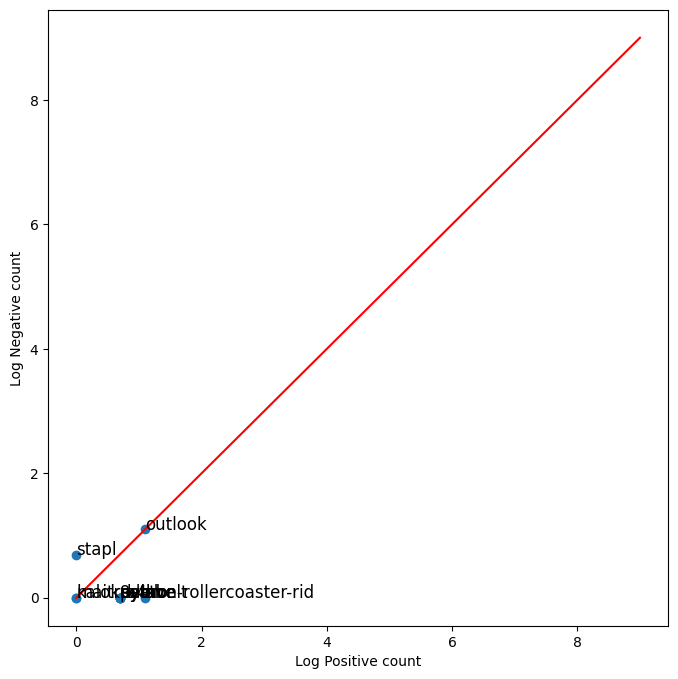

In [107]:
# Plotting the words

fig, ax = plt.subplots(figsize = (8, 8))
# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])
# do the same for the negative counts
y = np.log([x[2] + 1 for x in data])
# Plot a dot for each pair of words
ax.scatter(x, y)
# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)
ax.plot([0, 9], [0, 9], color = 'red') 
plt.show()